In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


C:\Users\jeshu\AppData\Local\Temp\ipykernel_16596\1299823552.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


== Ventas por Mes ==
   AnioMes  TotalPedidos  MontoVendido
0  2023-01             2        7700.0
1  2023-02             1        2000.0
2  2023-04             2     1001200.0
3  2023-05             2        6500.0


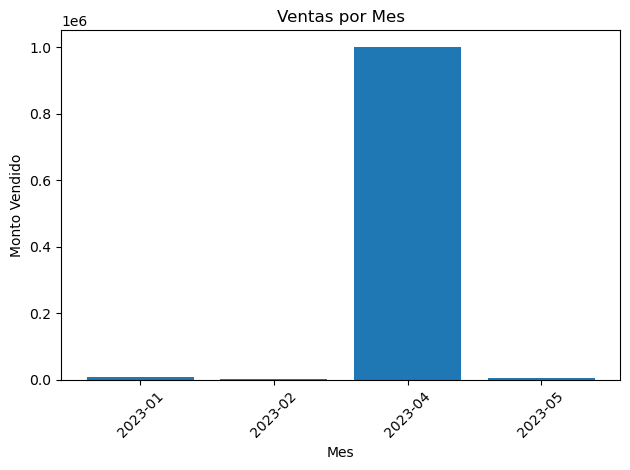

C:\Users\jeshu\AppData\Local\Temp\ipykernel_16596\1299823552.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)



== Top Artistas por Ventas ==
   ArtistaId       ArtistaNombre  TotalVentas
0          5   Leonardo da Vinci    1000000.0
1          2       Auguste Rodin      10000.0
2          1       Pablo Picasso       3000.0
3          4         Andy Warhol       2000.0
4          3         Frida Kahlo       1200.0
5          6  Katsushika Hokusai       1200.0


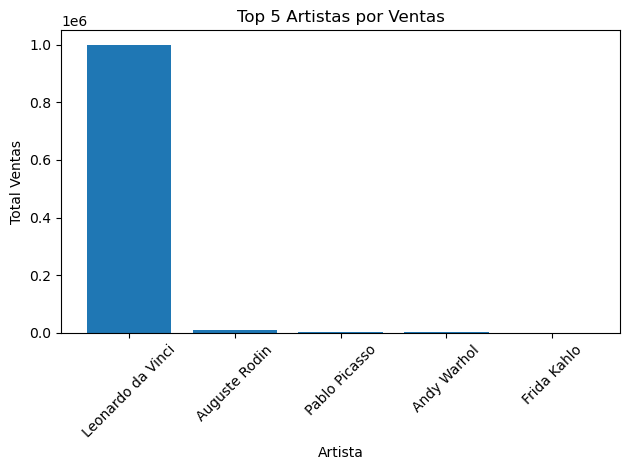


== Resumen Clientes ==
   ClienteId  NombreCompleto  TotalPedidos UltimaFechaPedido
0          1      Juan Pérez             1        2023-01-01
1          2    María García             2        2023-05-01
2          3    Carlos López             1        2023-02-10
3          4  Lucía Martínez             1        2023-05-20
4          5       Ana Núñez             1        2023-04-11
5          6   Miguel Romero             1        2023-04-10


C:\Users\jeshu\AppData\Local\Temp\ipykernel_16596\1299823552.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


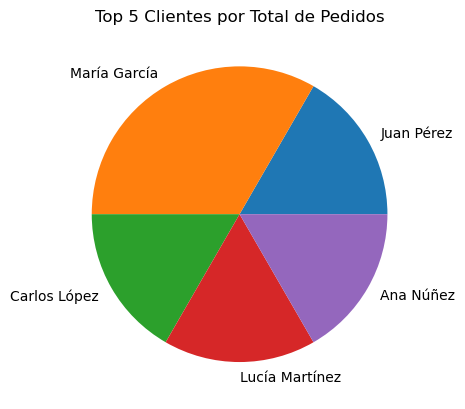


== Clientes por Región ==
          Region            Pais  ClienteId         Cliente  UltimoPedidoId
0       Cataluña          España          1      Juan Pérez               1
1   Buenos Aires       Argentina          2    María García               6
2     California  Estados Unidos          3    Carlos López               3
3  Île-de-France         Francia          4  Lucía Martínez               7
4         Madrid          España          5       Ana Núñez               5
5        Toscana          Italia          6   Miguel Romero               4


C:\Users\jeshu\AppData\Local\Temp\ipykernel_16596\1299823552.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


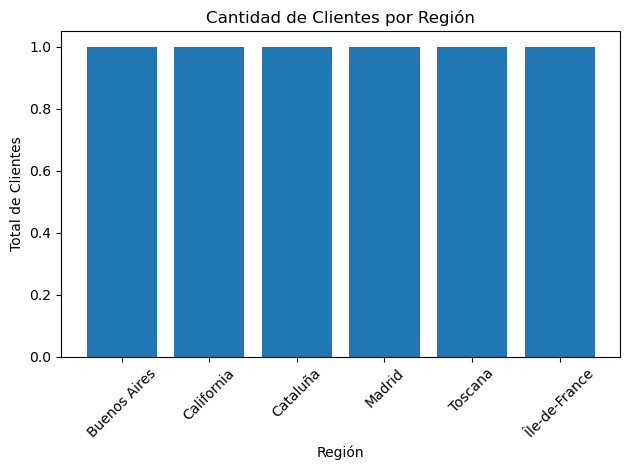

In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

def obtener_dataframe(query, connection):
    """
    Ejecuta una consulta y devuelve un DataFrame de pandas.
    """
    return pd.read_sql(query, connection)

def main():
    # Parámetros de conexión
    connection   = pymysql.connect(
        host     = 'localhost',
        user     = 'root',
        database = 'dbArte'
    )
    
    try:
        # --- 1) Vista: vw_VentasPorMes ---
        df_ventas_mes = obtener_dataframe("SELECT * FROM vw_VentasPorMes;", connection)
        print("== Ventas por Mes ==")
        print(df_ventas_mes)
        
        # Grafico de columnas: MontoVendido por Mes
        plt.figure()
        plt.bar(df_ventas_mes['AnioMes'], df_ventas_mes['MontoVendido'])
        plt.title("Ventas por Mes")
        plt.xlabel("Mes")
        plt.ylabel("Monto Vendido")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # --- 2) Vista: vw_TopArtistas ---
        df_top_artistas = obtener_dataframe("SELECT * FROM vw_TopArtistas;", connection)
        print("\n== Top Artistas por Ventas ==")
        print(df_top_artistas)
        
        # Gráfico de barras: Top 5 artistas
        df_top5 = df_top_artistas.head(5)
        plt.figure()
        plt.bar(df_top5['ArtistaNombre'], df_top5['TotalVentas'])
        plt.title("Top 5 Artistas por Ventas")
        plt.xlabel("Artista")
        plt.ylabel("Total Ventas")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # --- 3) Vista: vw_ResumenClientes ---
        df_resumen_clientes = obtener_dataframe("SELECT * FROM vw_ResumenClientes;", connection)
        print("\n== Resumen Clientes ==")
        print(df_resumen_clientes)
        
        # Gráfico de pastel de la proporción de pedidos por cliente (solo top 5)
        df_top5_clientes = df_resumen_clientes.head(5)
        plt.figure()
        plt.pie(df_top5_clientes['TotalPedidos'], labels=df_top5_clientes['NombreCompleto'])
        plt.title("Top 5 Clientes por Total de Pedidos")
        plt.show()
        
        # --- 4) Vista: vw_ClientesPorRegion ---
        df_clientes_region = obtener_dataframe("SELECT * FROM vw_ClientesPorRegion;", connection)
        print("\n== Clientes por Región ==")
        print(df_clientes_region)
        
        # Conteo de clientes por región
        region_counts = df_clientes_region.groupby('Region')['ClienteId'].count().reset_index(name='TotalClientes')
        plt.figure()
        plt.bar(region_counts['Region'], region_counts['TotalClientes'])
        plt.title("Cantidad de Clientes por Región")
        plt.xlabel("Región")
        plt.ylabel("Total de Clientes")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    finally:
        connection.close()

if __name__ == "__main__":
    main()